# 178. Rank Scores

Table: `Scores`  


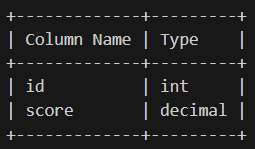  

id is the primary key (column with unique values) for this table.  
Each row of this table contains the score of a game. Score is a floating point value with two decimal places.  
 

Write a solution to find the rank of the scores. The ranking should be calculated according to the following rules:  

- The scores should be ranked from the highest to the lowest.    
- If there is a tie between two scores, both should have the same ranking.  
- After a tie, the next ranking number should be the next consecutive integer value. In other words, there should be no holes between ranks.  
Return the result table ordered by `score` in descending order.

The result format is in the following example.  

 

**Example 1:**  

**Input:**   
Scores table:   
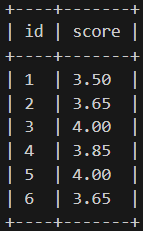    
**Output:**   
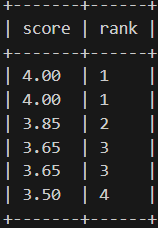  

In [69]:
import pandas as pd


def order_scores(scores: pd.DataFrame) -> pd.DataFrame:
    scores_ranked = scores.sort_values(by="score", ascending=False)[
        "score"
    ].drop_duplicates()
    scores_with_ranking = pd.DataFrame(
        {"score": scores_ranked, "rank": [i for i in range(1, len(scores_ranked) + 1)]}
    )
    result = pd.DataFrame({"score": scores_ranked})
    return pd.merge(scores, scores_with_ranking, on="score", how="left")[
        ["score", "rank"]
    ].sort_values(by="score", ascending=False)

# Testing


In [81]:
scores = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6, 7, 8], "score": [1.2, 4.5, 4.5, 5, 7, 7, 1, 8]}
)

0    2.0
1    3.0
2    3.0
3    4.0
4    5.0
5    5.0
6    1.0
7    6.0
Name: score, dtype: float64

In [71]:
order_scores(scores=scores)

,score,rank
7,8.0,1
4,7.0,2
5,7.0,2
3,5.0,3
1,4.5,4
2,4.5,4
0,1.2,5
6,1.0,6


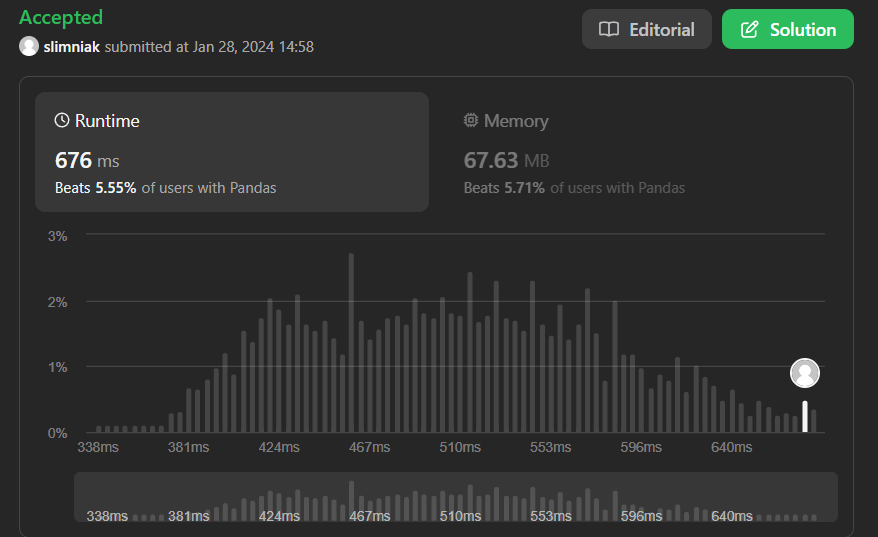

# trying to improve performance:


In [96]:
def order_scores(scores: pd.DataFrame) -> pd.DataFrame:
    scores["rank"] = scores["score"].rank(method="dense", ascending=False)
    return scores.drop(["id"], axis=1).sort_values(by="score", ascending=False)

In [97]:
order_scores(scores=scores)

,score,rank
7,8.0,1.0
4,7.0,2.0
5,7.0,2.0
3,5.0,3.0
1,4.5,4.0
2,4.5,4.0
0,1.2,5.0
6,1.0,6.0


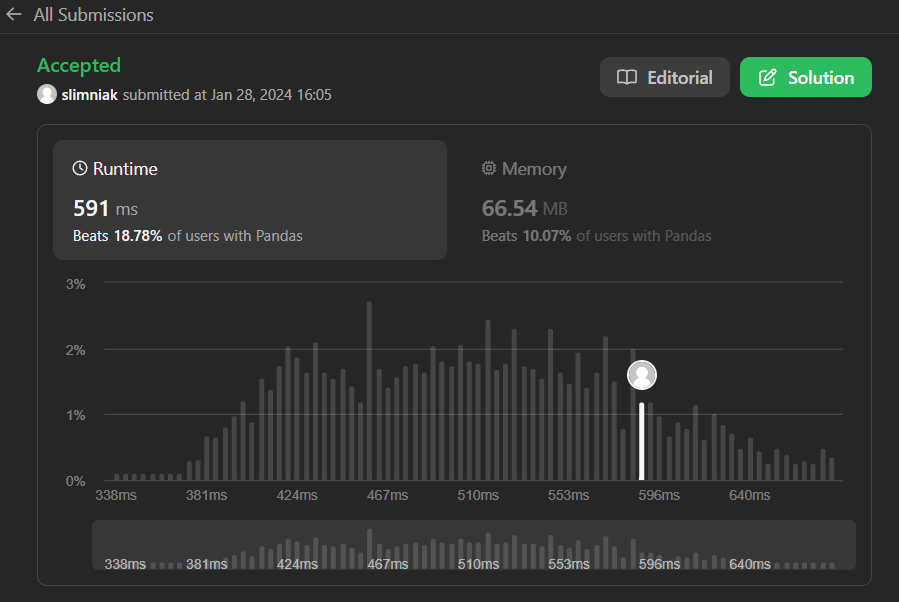 


testing performance and merging and pulling